In [39]:
#TAREA 2 DATOS ESPACIALES
#ALUMNO: JUAN DIEGO POZO ORTIZ
#CÓDIGO: 20210679

In [40]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [41]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [42]:
countries.shape

(252, 2)

In [43]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [44]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [45]:
rivers.shape

(98, 3)

In [46]:
cities.shape

(610, 4)

In [47]:
thailand=countries[countries.COUNTRY=='Thailand']

C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

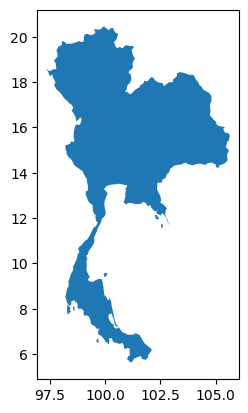

In [48]:

thailand.plot()

<Axes: >

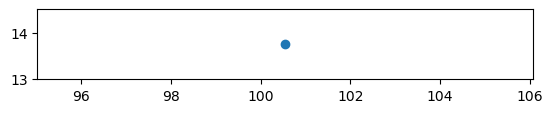

In [49]:
#VEREMOS LAS CIUDADES DENTRO DE TAILANDIA 

cities_thailand=cities[cities.COUNTRY=='Thailand']
cities_thailand.plot()

In [50]:
cities_thailand.head()

,NAME,COUNTRY,CAPITAL,geometry
231,Bangkok,Thailand,Y,POINT (100.55267 13.74557)


C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

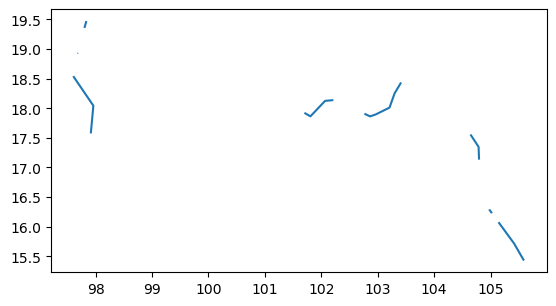

In [51]:
#RÍOS DE TAILANDIA 
rivers_thailand = gpd.clip(gdf=rivers, mask=thailand)
rivers_thailand.plot()

In [52]:
rivers_thailand.head()

,NAME,SYSTEM,geometry
40,Mekong,None,"MULTILINESTRING ((101.70156 17.92166, 101.8080..."
69,Salween,None,"MULTILINESTRING ((97.91654 17.57445, 97.96180 ..."


C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

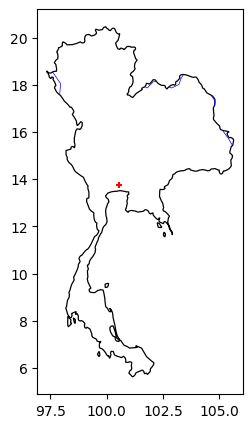

In [53]:
base = thailand.plot(facecolor="white", edgecolor='black', linewidth=0.9,figsize=(5,5))
cities_thailand.plot(marker='+', color='red', markersize=20,ax=base)
rivers_thailand.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [54]:
thailandCoord = [20.593684, 78.96288]

In [55]:
m = cities_thailand.explore(location=thailandCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_thailand.explore(m=m, color="blue",
                   name="rivers")
m

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [56]:
thailand.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [57]:
thailand.centroid


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14520\1526914381.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.centroid


213    POINT (101.01744 15.12733)
dtype: geometry

In [58]:
thailand.to_crs(4239).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [59]:
thailand.to_crs(4239).centroid

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14520\491468615.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.to_crs(4239).centroid


213    POINT (101.02088 15.12572)
dtype: geometry

C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14520\992306224.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailand.to_crs(4239).centroid.plot(color='Black',ax=base4239)


<Axes: >

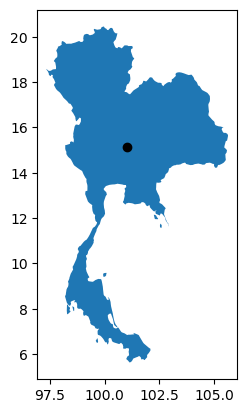

In [60]:
base4239=thailand.to_crs(4239).plot()
thailand.to_crs(4239).centroid.plot(color='Black',ax=base4239)

In [61]:
thailand_4239=thailand.to_crs(4239)
cities_thailand=cities[cities.COUNTRY=='Thailand']
cities_4239=cities_thailand.to_crs(thailand_4239.crs)
rivers_4239=rivers.to_crs(thailand_4239.crs)
rivers_4239=gpd.clip(gdf=rivers_4239,mask=thailand_4239)

C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

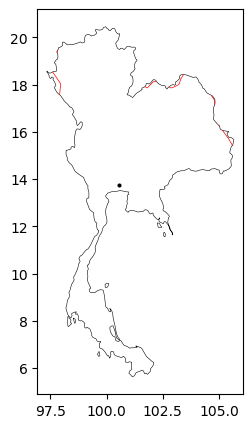

In [62]:
base = thailand_4239.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_4239.plot(marker='.', color='black', markersize=15,ax=base)
rivers_4239.plot(edgecolor='red', linewidth=0.5,ax=base)

C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Lenovo\anaconda3\envs\datosespaciales\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


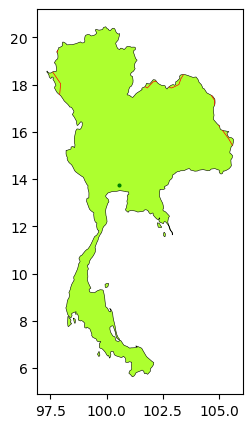

In [63]:
import matplotlib.pyplot as plt
basethailand = thailand_4239.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_4239.plot(marker='.', color='green', markersize=15,ax=basethailand)
mapEndthailand=rivers_4239.plot(edgecolor='red', linewidth=0.5,ax=basethailand)
plt.savefig(os.path.join("Figures",'mapEnd.jpg'))

In [64]:
countries.to_file(os.path.join("maps","worldmaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldmaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldmaps.gpkg"), layer='rivers', driver="GPKG")

AttributeError: module 'pandas' has no attribute 'Int64Index'

In [65]:
# link_worldmaps=

In [66]:
#from  fiona import listlayers

#listlayers(link_worldmaps)


In [ ]:
# countries_prueba=gpd.read_file(link_worldmaps,layer='countries')
# cities_prueba=gpd.read_file(link_worldmaps,layer='cities')
# rivers_prueba=gpd.read_file(link_worldmaps,layer='rivers')

In [ ]:
# base_prueba= countries.plot(facecolor='gainsboro')
# cities_prueba.plot(ax=base_prueba, markersize=0.5, color='green') 
# rivers_prueba.plot(ax=base_prueba, linewidth=0.5)

In [ ]:
# import os 
# thailand_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='country', driver="GPKG")
# cities_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='cities', driver="GPKG")
# rivers_4239.to_file(os.path.join("maps","thailand_4239","thailandMaps_4239.gpkg"), layer='rivers', driver="GPKG")

In [ ]:
# thailandMaps=


In [ ]:
#listlayers(thailandMaps)

In [ ]:
# countries=gpd.read_file(thailandMaps,layer='country')
# cities=gpd.read_file(thailandMaps,layer='cities')
# rivers=gpd.read_file(thailandMaps,layer='rivers')

In [ ]:
#base= countries.plot(facecolor='gainsboro')
#cities.plot(ax=base, markersize=0.5, color='green') 
#rivers.plot(ax=base, linewidth=0.5)